# Avacado Project
# Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

To download the dataset, use the link given below. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("E:/Datatrained/Practice Project/Avacado Project/avocado.csv")

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [5]:
df.shape

(16468, 14)

In [14]:
df.drop(columns = ["Unnamed: 0"], axis=1, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 1.6+ MB


we can notice data having huge amount of null values

In [17]:
df.isnull().mean()*100

Date            90.788195
AveragePrice    90.788195
Total Volume    90.788195
4046            90.788195
4225            90.788195
4770            90.788195
Total Bags      90.788195
Small Bags      90.788195
Large Bags      90.788195
XLarge Bags     90.788195
type            90.788195
year            90.788195
region          90.788195
dtype: float64

In [18]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [19]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [20]:
# Exploring the data variable
df.AveragePrice.unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.18, 1.29, 1.25, 1.03, 1.39,
       1.4 , 1.36, 1.3 , 0.88, 1.21, 0.9 , 0.94, 0.75, 0.77, 0.81, 0.8 ,
       0.72, 0.79, 0.67, 0.82, 0.68, 0.76, 0.91, 1.38, 0.92, 0.78, 0.74,
       0.62, 0.83, 0.87, 0.73, 0.7 , 0.89, 0.85, 1.44, 1.42, 1.41, 0.49,
       0.53, 0.66, 0.56, 0.6 , 0.71, 0.65, 0.58, 0.54, 0.52, 0.51, 0.57,
       0.63, 0.64, 0.61, 0.84, 0.86, 0.69, 1.52, 1.53, 1.49, 1.48, 1.56,
       1.62, 1.63, 1.46, 1.51, 1.61, 1.47, 1.66, 1.57, 1.6 , 1.5 , 1.68,
       1.54, 1.64, 1.58,  nan])

In [21]:
df.AveragePrice.value_counts()

1.08    46
0.99    44
1.03    44
1.10    43
1.09    43
        ..
1.58     1
0.49     1
1.50     1
1.54     1
0.54     1
Name: AveragePrice, Length: 113, dtype: int64

<AxesSubplot:>

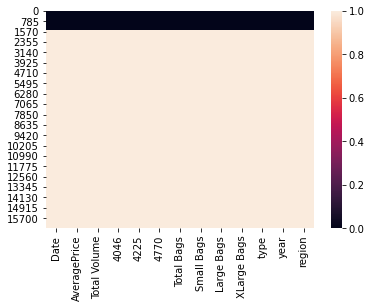

In [22]:
# Data Visualization to cheak the missing values
sns.heatmap(df.isnull())

Null Values are available in similar rows in every columns so we will remove them since no impact in our model

In [23]:
df.dropna(inplace=True)

In [24]:
df.shape

(1517, 13)

After dropping the null rows we have 1517 rows and 14 columns only

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 165.9+ KB


In [26]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


# Observation:-

- No missing values in the dataset
- 10 numerical columns and 3 object columns
- Though features are not normaly distributed, are close to normality
- some of the features have minimum (requires re-check)
- Each feature has difference scale range
- some of these columns only informing about bags which not relevant for prediction(better to drop them)

In [27]:
df.drop(['XLarge Bags','Small Bags','Total Bags','Large Bags'], axis=1, inplace= True)

In [28]:
df.shape

(1517, 9)

In [29]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,2016.000000


In [30]:
df.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,conventional,2015.0,Albany


In [31]:
df[["Date", "Month", "Year"]] = df["Date"].str.split("-", expand = True)

In [32]:
# converting objects into integer datatype
df[["Date", "Month", "Year"]]=df[["Date", "Month", "Year"]].astype(int)

In [33]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region,Month,Year
0,27,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015.0,Albany,12,2015
1,20,1.35,54876.98,674.28,44638.81,58.33,conventional,2015.0,Albany,12,2015
2,13,0.93,118220.22,794.70,109149.67,130.50,conventional,2015.0,Albany,12,2015
3,6,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015.0,Albany,12,2015
4,29,1.28,51039.60,941.48,43838.39,75.78,conventional,2015.0,Albany,11,2015


In [34]:
df["Year"].value_counts()

2015    1270
2016     247
Name: Year, dtype: int64

In [35]:
df['year'].value_counts()

2015.0    1270
2016.0     247
Name: year, dtype: int64

Now we can notice we have 2 columns for years and both having same unique value so droping one of them

In [36]:
df.drop(['year'], axis=1, inplace= True)

In [37]:
df['type'].nunique()

1

As we can see we have only one type so we are droping the column because all values are same.

In [38]:
df.drop(['type'], axis=1, inplace= True)

In [39]:
df['region'].nunique()

51

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   int32  
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   region        1517 non-null   object 
 7   Month         1517 non-null   int32  
 8   Year          1517 non-null   int32  
dtypes: float64(5), int32(3), object(1)
memory usage: 100.7+ KB


No missing values in the dataset / 
there is no minimum value = 0 / 
now 8 numerical and 1 object columns in data

# EDA

In [41]:
from scipy.stats import skew
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [42]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,region,Month,Year
0,27,1.33,64236.62,1036.74,54454.85,48.16,Albany,12,2015
1,20,1.35,54876.98,674.28,44638.81,58.33,Albany,12,2015
2,13,0.93,118220.22,794.70,109149.67,130.50,Albany,12,2015
3,6,1.08,78992.15,1132.00,71976.41,72.58,Albany,12,2015
4,29,1.28,51039.60,941.48,43838.39,75.78,Albany,11,2015


In [43]:
df.corr()

,Date,AveragePrice,Total Volume,4046,4225,4770,Month,Year
Date,1.000000,0.092531,-0.022423,-0.018394,-0.032709,-0.014611,0.034279,0.023543
AveragePrice,0.092531,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,0.066859,0.178683
Total Volume,-0.022423,-0.140470,1.000000,0.985568,0.987154,0.934347,-0.090520,-0.004189
4046,-0.018394,-0.190096,0.985568,1.000000,0.951952,0.898570,-0.090647,-0.040439
4225,-0.032709,-0.092084,0.987154,0.951952,1.000000,0.927757,-0.091329,-0.007254
4770,-0.014611,-0.100567,0.934347,0.898570,0.927757,1.000000,-0.074855,0.029222
Month,0.034279,0.066859,-0.090520,-0.090647,-0.091329,-0.074855,1.000000,0.004111
Year,0.023543,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.004111,1.000000


<AxesSubplot:>

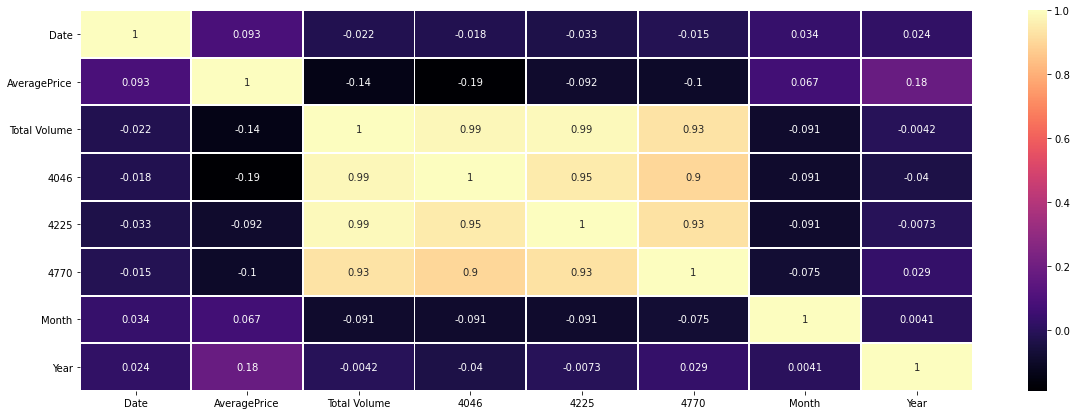

In [44]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor='white',cmap='magma')

<AxesSubplot:xlabel='Date', ylabel='Count'>

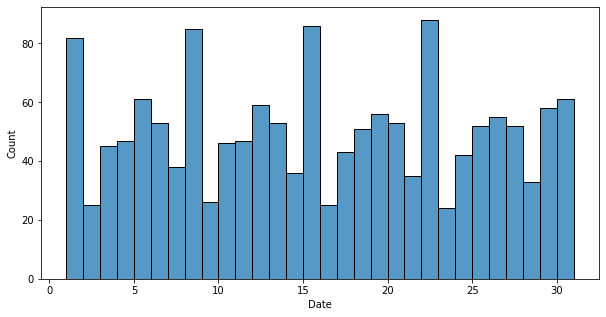

In [45]:
plt.figure(figsize=(10,5))
sns.histplot(df['Date'], bins=30)

//Sold on everyday is around 40 to 60 avacado//
maximum sold in a day//
we can notice after every 6 days there is hike in sell that must be the weekend

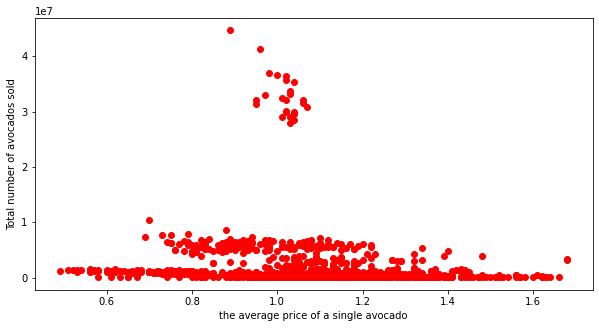

In [46]:
plt.figure(figsize=(10,5))
plt.scatter(df['AveragePrice'],df['Total Volume'],c='Red')
plt.xlabel('the average price of a single avocado')
plt.ylabel('Total number of avocados sold')
plt.show()

max average price seems 0.8 to 1.2 //
having outliers as well

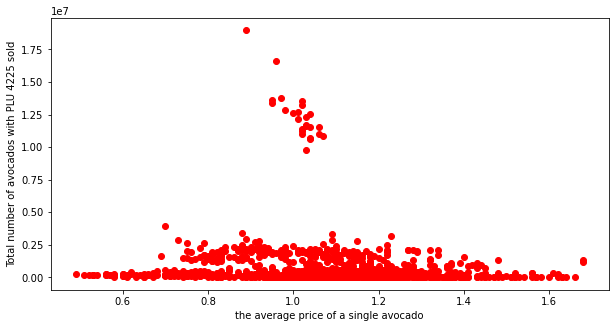

In [47]:
plt.figure(figsize=(10,5))
plt.scatter(df['AveragePrice'],df['4225'],c='Red')
plt.xlabel('the average price of a single avocado')
plt.ylabel('Total number of avocados with PLU 4225 sold')
plt.show()

Here we also see maximum average price is 0.8 to 1.3 and outliers as well

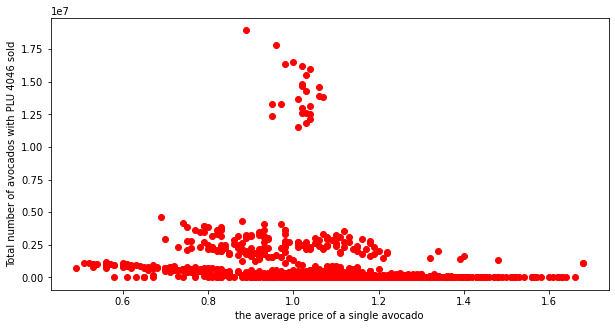

In [48]:
plt.figure(figsize=(10,5))
plt.scatter(df['AveragePrice'],df['4046'],c='Red')
plt.xlabel('the average price of a single avocado')
plt.ylabel('Total number of avocados with PLU 4046 sold')
plt.show()

Here we also see maximum average price is 0.8 to 1.3 and outliers as well

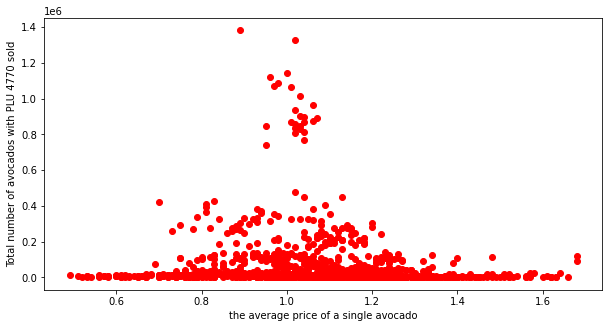

In [49]:
plt.figure(figsize=(10,5))
plt.scatter(df['AveragePrice'],df['4770'],c='Red')
plt.xlabel('the average price of a single avocado')
plt.ylabel('Total number of avocados with PLU 4770 sold')
plt.show()

Here we also see maximum average price is 0.8 to 1.2 and outliers as well

<AxesSubplot:xlabel='Year', ylabel='count'>

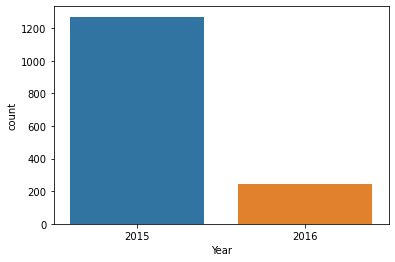

In [50]:
sns.countplot(x='Year',data=df)

We see here maximum data we have from year of 2015

<AxesSubplot:xlabel='Month', ylabel='count'>

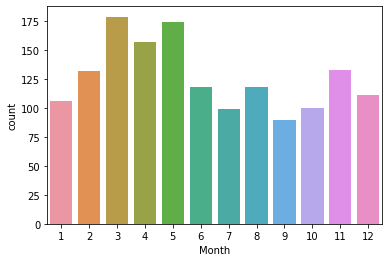

In [51]:
sns.countplot(x='Month',data=df)

Here we can see maximum avacado are sold in month 3, 4, and 5 and months are on average sale

# Using LabelEncoder for convering categorical to numerical

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   int32  
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   region        1517 non-null   object 
 7   Month         1517 non-null   int32  
 8   Year          1517 non-null   int32  
dtypes: float64(5), int32(3), object(1)
memory usage: 133.0+ KB


In [53]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['region']=le.fit_transform(df['region'])

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   int32  
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   region        1517 non-null   int32  
 7   Month         1517 non-null   int32  
 8   Year          1517 non-null   int32  
dtypes: float64(5), int32(4)
memory usage: 127.1 KB


# Skewness Handling

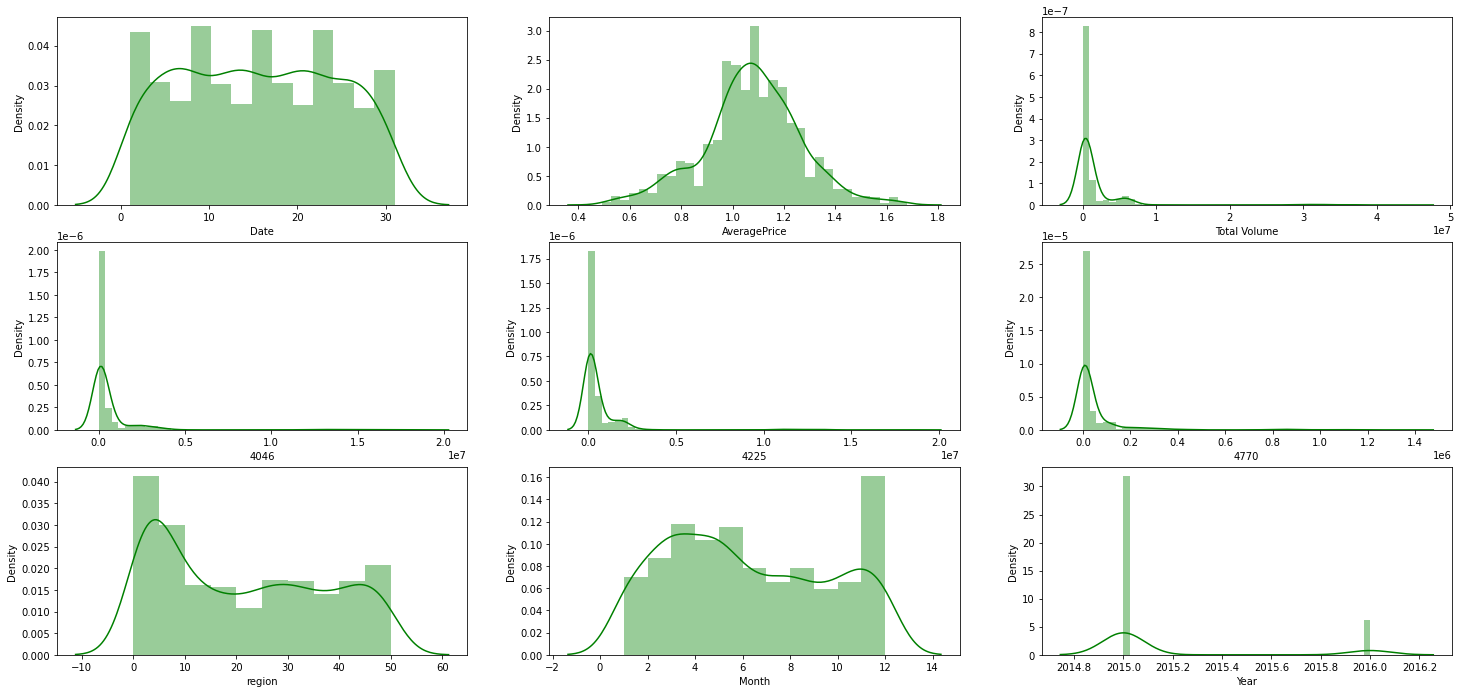

In [55]:
plt.figure(figsize=(25,20))
for i in enumerate(df.columns):
    plt.subplot(5,3,i[0]+1)
    sns.distplot(df[i[1]],color='g')


In [56]:
df.skew()

Date            0.027740
AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
region          0.288146
Month           0.233418
Year            1.828332
dtype: float64

# skewness more than+/- 0.5 will we treated
we can see here most of the columns are skewed
will only deal with numercal columns
Total Volume
4046
4225
4770
will be treated

In [57]:
from sklearn.preprocessing import power_transform

df[['Total Volume','4046','4225','4770']]=power_transform(df[['Total Volume','4046','4225','4770']],method='yeo-johnson')

In [58]:
df.skew()

Date            0.027740
AveragePrice   -0.109444
Total Volume    0.000000
4046           -0.012059
4225            0.008450
4770           -0.032945
region          0.288146
Month           0.233418
Year            1.828332
dtype: float64

we can see here skewness is removed from all columns

# Outliers Handling

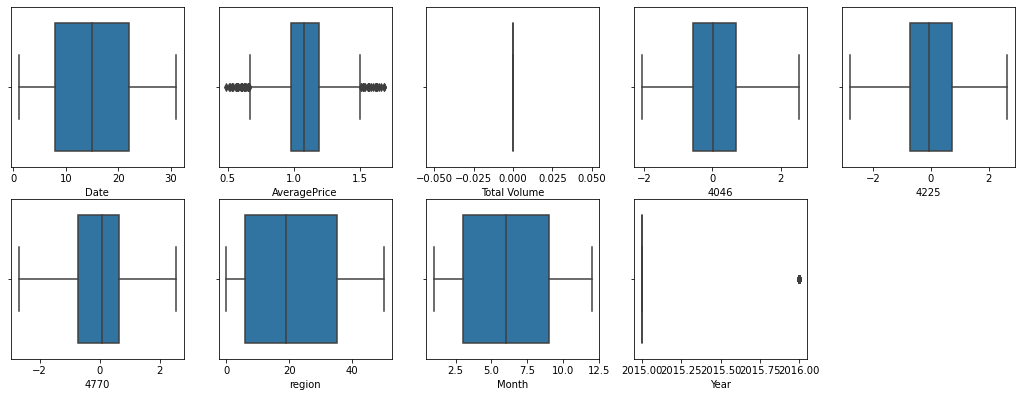

In [59]:
plt.figure(figsize=(18,10))
for o in enumerate(df):
    plt.subplot(3,5,o[0]+1)
    sns.boxplot(df[o[1]])

Only Target columns seems having outliers after skewness removed .

In [60]:
#zscore

from scipy.stats import zscore

z=np.abs(zscore(df))

print(np.where(z>3))

(array([ 760, 1411, 1457, 1458], dtype=int64), array([1, 1, 1, 1], dtype=int64))


In [61]:
df_1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (1517, 9)
After removing outliers:: (0, 9)


Zscore removing all rows from data

In [62]:
#IQR
from scipy import stats 
IQR = stats.iqr(df) 
IQR 

12.0

In [63]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(1517, 9)


according IQR not outliers present so taking as it is

In [64]:
df=df_out

# Dividing data into X and Y

In [65]:
x=df.drop(['AveragePrice'],axis=1)
y=df['AveragePrice']

In [66]:
x.shape

(1517, 8)

In [67]:
y.shape

(1517,)

Scaling X values

In [68]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

data have been scalled

In [69]:
pd.DataFrame(x).isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

In [70]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7
count,1517.000000,1517.0,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,0.481652,0.0,0.446655,0.514899,0.515111,0.423929,0.469707,0.162821
std,0.293224,0.0,0.217371,0.183939,0.190796,0.322648,0.308295,0.369324
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.233333,0.0,0.320944,0.383731,0.375955,0.120000,0.181818,0.000000
50%,0.466667,0.0,0.448171,0.501067,0.529674,0.380000,0.454545,0.000000
75%,0.700000,0.0,0.594504,0.650355,0.636561,0.700000,0.727273,0.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


data also have scalled

# Splitting the data for training and testing

In [71]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

Let's find the best random state in below cell

In [73]:
from sklearn.linear_model import LinearRegression


LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is: {r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is: {r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is: 0.3102354025933731
At random state 0, The test accuracy is: 0.2444070794413875


At random state 1, The training accuracy is: 0.27619654942729854
At random state 1, The test accuracy is: 0.3627785280100134


At random state 2, The training accuracy is: 0.28346296302432017
At random state 2, The test accuracy is: 0.3389365423247165


At random state 3, The training accuracy is: 0.3169559109186374
At random state 3, The test accuracy is: 0.20805703429022926


At random state 4, The training accuracy is: 0.32252164937847017
At random state 4, The test accuracy is: 0.17341072301487725


At random state 5, The training accuracy is: 0.2953391466438481
At random state 5, The test accuracy is: 0.30184366507661464


At random state 6, The training accuracy is: 0.29763208136917507
At random state 6, The test accuracy is: 0.27548493486002346


At random state 7, The training accuracy is: 0.3085524911807649
At random state 7, The test accuracy is: 0.245

random state=43 giving highest accuracy, choosing that as random state

In [74]:
#splitting the data into 78% training and 22% testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=43)

In [75]:
x_train.shape

(1183, 8)

In [76]:
y_train.shape

(1183,)

In [77]:
x_test.shape

(334, 8)

In [78]:
y_test.shape

(334,)

# MODEL BUILDING:

Linear Regression

In [79]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.2701311121398222


In [80]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 0.02709800786723337
MAE: 0.1274411654821505
r2_score: -1.839899996326801


# Ridge

In [81]:
from sklearn.linear_model import Ridge

R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.26996059701127517


In [82]:
print('MSE:',mean_squared_error(R_predict,y_test))
print('MAE:',mean_absolute_error(R_predict,y_test))
print('r2_score:',r2_score(R_predict,y_test))

MSE: 0.02720641385534362
MAE: 0.12770720970235708
r2_score: -1.9554189057412468


# SVR
# SVR(kernel='linear')

In [84]:
from sklearn.svm import SVR

svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.25861720067957594


In [85]:
print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))

MSE: 0.028283040949155906
MAE: 0.12871461461363184
r2_score: -2.8800404347726705


# SVR(kernel='poly')

In [86]:
svr_p=SVR(kernel='poly')
svr_p.fit(x_train,y_train)
print(svr_p.score(x_train,y_train))
svrpred_p=svr_p.predict(x_test)


0.575354033248693


In [87]:
print('MSE:',mean_squared_error(svrpred_p,y_test))
print('MAE:',mean_absolute_error(svrpred_p,y_test))
print('r2_score:',r2_score(svrpred_p,y_test))

MSE: 0.020073547024926166
MAE: 0.1075150545574723
r2_score: 0.24977172757051314


# SVR(kernel='rbf')

In [88]:
svr_r=SVR(kernel='rbf')
svr_r.fit(x_train,y_train)
print(svr_r.score(x_train,y_train))
svrpred_r=svr_r.predict(x_test)

0.7133887752033343


In [89]:
print('MSE:',mean_squared_error(svrpred_r,y_test))
print('MAE:',mean_absolute_error(svrpred_r,y_test))
print('r2_score:',r2_score(svrpred_r,y_test))

MSE: 0.014425165245500705
MAE: 0.09167336171509548
r2_score: 0.4589217891712394


# RandomForestRegressor

In [90]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

0.9720486170520519


In [91]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

MSE: 0.006292807844311382
MAE: 0.0571568862275449
r2_score: 0.7906231310809545


# DecisionTreeRegressor

In [92]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

1.0


In [93]:
print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))


MSE: 0.009612574850299399
MAE: 0.07095808383233533
r2_score: 0.780075672201593


# GradientBoostingRegressor

In [94]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.8129989241196538


In [95]:
print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))

MSE: 0.010825371061879755
MAE: 0.08084566302521515
r2_score: 0.5353082916343385


# Cross Validation

In [96]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             Ridge(),
             SVR(kernel='linear'),
             SVR(kernel='poly'),
             SVR(kernel='rbf'),
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor(),]
            


names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 0.031240, 0.018092
R    : 0.031190, 0.018186
svr    : 0.031631, 0.019666
svr_p    : 0.072474, 0.085390
svr_r    : 0.033589, 0.027746
RF    : 0.032910, 0.023120
DTR    : 0.046148, 0.020202
GBR    : 0.027286, 0.014486


-Accourding to all metrics score selecting the RandomForestRegressor as final model for hyper parameter tuning

# HYPER PARAMETER TUNING:

GridSearchCV

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
RF=RandomForestRegressor()
param={
     'n_estimators':[100,200,],
    'criterion':["mse", "mae"],
    'min_samples_split':[2],
   'min_samples_leaf' : [1],
}

In [99]:
RF_grid=GridSearchCV(RandomForestRegressor(),param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [100]:
RF_grid.fit(x_train,y_train)
RF_grid_PRED=RF_grid.best_estimator_.predict(x_test)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


In [101]:
RF_grid.best_params_

{'criterion': 'mse',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [102]:
print('MSE:',mean_squared_error(RF_grid_PRED,y_test))
print('MAE:',mean_absolute_error(RF_grid_PRED,y_test))
print('r2_score:',r2_score(RF_grid_PRED,y_test))

MSE: 0.00640097206586827
MAE: 0.05788473053892216
r2_score: 0.7818872148698126


with best parameters

In [103]:
RF=RandomForestRegressor()
param={
     'n_estimators':[100],
    'criterion':["mse"],
    'min_samples_split':[2],
   'min_samples_leaf' : [1],
}

In [104]:
RF_grid=GridSearchCV(RandomForestRegressor(),param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [105]:
RF_grid.fit(x_train,y_train)
RF_grid_PRED=RF_grid.best_estimator_.predict(x_test)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


In [106]:
print('MSE:',mean_squared_error(RF_grid_PRED,y_test))
print('MAE:',mean_absolute_error(RF_grid_PRED,y_test))
print('r2_score:',r2_score(RF_grid_PRED,y_test))

MSE: 0.006446320179640727
MAE: 0.057823353293413225
r2_score: 0.7846681102569613


there is improvement in r2_score after tuning the model

In [107]:
RF_grid_PRED

array([1.0554, 0.7717, 1.0006, 1.125 , 1.0898, 1.0591, 1.1993, 0.8248,
       1.1172, 1.0672, 0.8297, 1.3513, 1.0667, 0.748 , 1.026 , 1.1178,
       1.1671, 1.0234, 0.9822, 0.9565, 1.0323, 1.2372, 1.1255, 1.1248,
       1.1358, 1.2087, 0.9995, 0.799 , 1.1692, 1.1603, 1.3445, 0.6621,
       1.1182, 1.1769, 1.0165, 1.3549, 1.02  , 1.0078, 1.0442, 1.0546,
       1.3392, 1.1022, 1.1901, 1.0416, 1.1601, 0.9413, 1.1361, 1.1173,
       1.0396, 1.2142, 1.0904, 1.1655, 1.2748, 0.9148, 1.1132, 0.7515,
       1.3186, 1.1592, 1.0244, 1.2119, 1.1911, 0.865 , 1.1253, 1.0668,
       0.9999, 1.191 , 0.9829, 1.0736, 1.0225, 1.0882, 1.1079, 1.0656,
       1.1527, 0.8442, 1.2257, 0.7675, 1.0737, 1.0397, 1.54  , 1.0948,
       1.1778, 0.9569, 1.1102, 1.4086, 0.7715, 0.8447, 1.1981, 1.1135,
       1.1335, 1.0816, 1.0519, 1.1871, 1.0206, 0.5916, 1.2721, 1.1629,
       0.7329, 1.1373, 1.0188, 1.297 , 0.7502, 1.3624, 1.0428, 1.0603,
       1.4101, 1.2399, 1.4372, 1.0431, 1.1157, 1.1904, 1.3369, 0.6703,
      

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

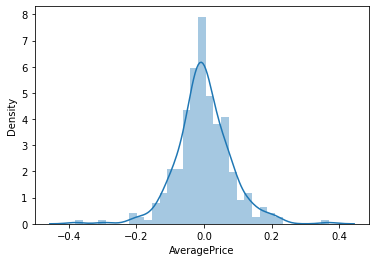

In [108]:
sns.distplot(RF_grid_PRED-y_test)

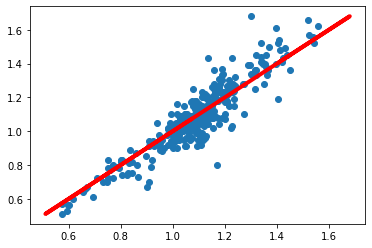

In [109]:
plt.scatter(RF_grid_PRED,y_test)
plt.plot(y_test,y_test,linewidth=4,color='Red')

In [110]:
print('MSE:',mean_squared_error(RF_grid_PRED,y_test))
print('MAE:',mean_absolute_error(RF_grid_PRED,y_test))
print('r2_score:',r2_score(RF_grid_PRED,y_test))

MSE: 0.006446320179640727
MAE: 0.057823353293413225
r2_score: 0.7846681102569613


we can notice there is a improvement in r2_score after tuning

# saving the model

In [111]:
import joblib

In [112]:
joblib.dump(RF_grid.best_estimator_,'Avacado_Prediction_Project.obj')

['Avacado_Prediction_Project.obj']

In [113]:
model=joblib.load('Avacado_Prediction_Project.obj')

In [114]:
model.predict(x_test)

array([1.0554, 0.7717, 1.0006, 1.125 , 1.0898, 1.0591, 1.1993, 0.8248,
       1.1172, 1.0672, 0.8297, 1.3513, 1.0667, 0.748 , 1.026 , 1.1178,
       1.1671, 1.0234, 0.9822, 0.9565, 1.0323, 1.2372, 1.1255, 1.1248,
       1.1358, 1.2087, 0.9995, 0.799 , 1.1692, 1.1603, 1.3445, 0.6621,
       1.1182, 1.1769, 1.0165, 1.3549, 1.02  , 1.0078, 1.0442, 1.0546,
       1.3392, 1.1022, 1.1901, 1.0416, 1.1601, 0.9413, 1.1361, 1.1173,
       1.0396, 1.2142, 1.0904, 1.1655, 1.2748, 0.9148, 1.1132, 0.7515,
       1.3186, 1.1592, 1.0244, 1.2119, 1.1911, 0.865 , 1.1253, 1.0668,
       0.9999, 1.191 , 0.9829, 1.0736, 1.0225, 1.0882, 1.1079, 1.0656,
       1.1527, 0.8442, 1.2257, 0.7675, 1.0737, 1.0397, 1.54  , 1.0948,
       1.1778, 0.9569, 1.1102, 1.4086, 0.7715, 0.8447, 1.1981, 1.1135,
       1.1335, 1.0816, 1.0519, 1.1871, 1.0206, 0.5916, 1.2721, 1.1629,
       0.7329, 1.1373, 1.0188, 1.297 , 0.7502, 1.3624, 1.0428, 1.0603,
       1.4101, 1.2399, 1.4372, 1.0431, 1.1157, 1.1904, 1.3369, 0.6703,
      

In [115]:
print('MSE:',mean_squared_error(RF_grid_PRED,y_test))
print('MAE:',mean_absolute_error(RF_grid_PRED,y_test))
print('r2_score:',r2_score(RF_grid_PRED,y_test))

MSE: 0.006446320179640727
MAE: 0.057823353293413225
r2_score: 0.7846681102569613
